[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/06_population_multiple/love_affairs.ipynb)

Phase portrait plots of love affairs from Strogatz Section 5.3 and corresponding questions at the end of chapter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cycle of love and hate: Romeo loves Juliet more when J loves R, but J does the opposite
a = 0
b = 1
c = -0.5
d = 0

In [3]:
# Initialize solution arrays
steps = 10
RR = np.zeros((2*steps+1, 2*steps+1), dtype=np.float32)
JJ = np.copy(RR)
u = np.copy(RR)
v = np.copy(RR)
# Note that we only want to 'copy' or 'deepcopy' the data,
# if we do = then will copy the address of array,
# e.g. when we modify u, RR will also be changed

In [4]:
# Iterate through the cycles
i = -1
for J in range(-steps, steps+1, 1):
    i = i+1
    j = -1
    for R in range(-steps, steps+1, 1):
        j = j+1
        RR[i,j] = R
        JJ[i,j] = J
        u[i,j] = a*R + b*J
        v[i,j] = c*R + d*J

In [5]:
# Eigendecompose of A
A = np.array([[a,b], [c,d]])
# Compute eigenvalues and eigenvectors
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
D,V = np.linalg.eig(A)
print('D = ', D, '\n\nV = \n', V)

D =  [0.+0.70710678j 0.-0.70710678j] 

V = 
 [[0.81649658+0.j         0.81649658-0.j        ]
 [0.        +0.57735027j 0.        -0.57735027j]]


In [6]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

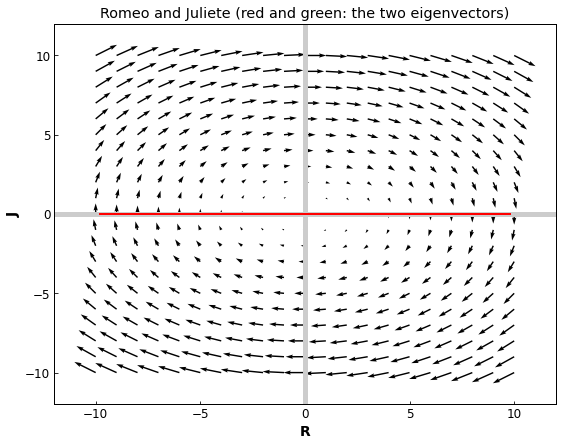

In [7]:
# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

# Plot arrows in phase plane
q = ax.quiver(RR, JJ, u, v)

vmax = 12
V = V*vmax
# Plot axes
ax.plot([0,0], [-vmax, vmax], color=[0.8, 0.8, 0.8], linewidth=5)
ax.plot([-vmax, vmax], [0,0], color=[0.8, 0.8, 0.8], linewidth=5)
# Plot eigenvectors
ax.plot(np.real([-V[0,0], V[0,0]]), np.real([-V[1,0], V[1,0]]), color='g', linewidth=2)
ax.plot(np.real([-V[0,1], V[0,1]]), np.real([-V[1, 1], V[1, 1]]), color='r', linewidth=2)

# Set axes range
ax.set_xlim([-vmax, vmax])
ax.set_ylim([-vmax, vmax])

# Set title, axes labels and legends
ax.set_title('Romeo and Juliete (red and green: the two eigenvectors)')
ax.set_xlabel('R')
ax.set_ylabel('J')

plt.show()